In [1]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 9})

In [2]:
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [5]:
# defaults: max_depth=3, learning_rate=0.1, n_estimators=100

grad_boost = GradientBoostingClassifier(random_state=0)
grad_boost.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [6]:
print("Accuracy on training set: {:.3f}".format(grad_boost.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grad_boost.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [7]:
# limit max_depth of trees to reduce overfitting

grad_boost_dep = GradientBoostingClassifier(random_state=0, max_depth=1)
grad_boost_dep.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [8]:
print("Accuracy on training set: {:.3f}".format(grad_boost_dep.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grad_boost_dep.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [9]:
# decrease learning rate to reduce overfitting

grad_boost_lr = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
grad_boost_lr.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
print("Accuracy on training set: {:.3f}".format(grad_boost_lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(grad_boost_lr.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Text(0, 0.5, 'Feature')

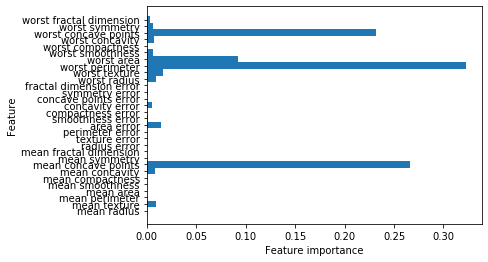

In [11]:
# visualize feature importances of grad_boost_dep

n_features = cancer.data.shape[1]
plt.barh(range(n_features), grad_boost_dep.feature_importances_, height=1, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")